* ViT: instead of removing a layer manually,
    * Load a backbone-only ViT model (no classification head).
    * take the token embedding from the final transformer layer as the image feature vector

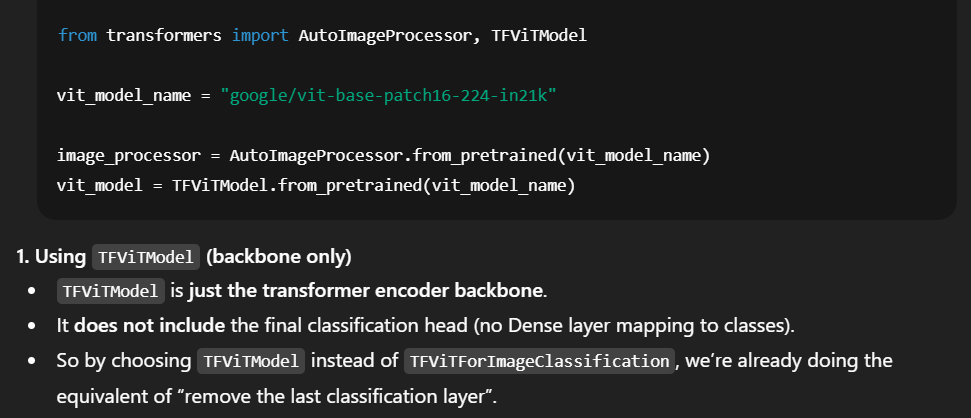

Step 1 – Imports

In [31]:
!pip install transformers

In [32]:
# Step 1 - Imports

import os  # work with folders and file paths
import pickle  # save and load feature dictionaries
import shutil  # remove unwanted folders

import torch  # main deep learning framework
from PIL import Image  # load images

from transformers import AutoImageProcessor, ViTModel  # ViT + preprocessor


Step 2 – Load the ViT model

In [34]:
# Step 2 - Load ViT model (PyTorch)

vit_model_name = "google/vit-base-patch16-224-in21k"  # ViT checkpoint
image_processor = AutoImageProcessor.from_pretrained(vit_model_name)  # image preprocessor
vit_model = ViTModel.from_pretrained(vit_model_name)  # load pretrained ViT

vit_model.eval()  # set model to evaluation mode


Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


ViTModel(
  (embeddings): ViTEmbeddings(
    (patch_embeddings): ViTPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): ViTEncoder(
    (layer): ModuleList(
      (0-11): 12 x ViTLayer(
        (attention): ViTAttention(
          (attention): ViTSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
          )
          (output): ViTSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): ViTIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
          (intermediate_act_fn): GELUActivation()
        )
        (output): ViTOutput(
          (d

STEP 3 — Show Model Structure

In [35]:
# Step 3 - Show ViT model summary

print(vit_model)  # print architecture details


ViTModel(
  (embeddings): ViTEmbeddings(
    (patch_embeddings): ViTPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): ViTEncoder(
    (layer): ModuleList(
      (0-11): 12 x ViTLayer(
        (attention): ViTAttention(
          (attention): ViTSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
          )
          (output): ViTSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): ViTIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
          (intermediate_act_fn): GELUActivation()
        )
        (output): ViTOutput(
          (d

STEP 4 — Prepare Feature Storage

In [36]:
# Step 4 - Prepare feature storage and image directory

features = {}  # dictionary to store features
directory = r"test B- front masked images - side"  # your image folder


STEP 5 — Remove .ipynb_checkpoints

In [37]:
# Step 5 - Remove notebook checkpoint folders

folder = "test B- front masked images - side"

for item in os.listdir(folder):  # loop through folder items
    path = os.path.join(folder, item)
    if item == ".ipynb_checkpoints" and os.path.isdir(path):
        shutil.rmtree(path)  # remove unwanted folder
        print("Removed:", path)


STEP 6 — Extract Features With ViT

In [38]:
# Step 6 - Extract features using ViT (PyTorch)

valid_extensions = {".png", ".jpg", ".jpeg", ".bmp", ".gif"}  # allowed image types

file_list = os.listdir(directory)  # list folder items
print(f"Found {len(file_list)} files in directory: {directory}")

for idx, image_name in enumerate(file_list, start=1):

    image_path = os.path.join(directory, image_name)

    # skip non-files
    if not os.path.isfile(image_path):
        continue

    # check image extension
    ext = os.path.splitext(image_name)[1].lower()
    if ext not in valid_extensions:
        continue

    # load image with PIL
    img = Image.open(image_path).convert("RGB")

    # preprocess image for ViT
    inputs = image_processor(images=img, return_tensors="pt")

    # extract features (CLS token)
    with torch.no_grad():  # disables gradients
        outputs = vit_model(**inputs)
        cls_embedding = outputs.last_hidden_state[:, 0, :]  # CLS token

    feature_vector = cls_embedding.cpu().numpy()  # convert tensor → numpy

    # store in dictionary
    features[image_path] = feature_vector

    print(f"Processed {idx}/{len(file_list)}: {image_name}")


Found 1160 files in directory: test B- front masked images - side
Processed 1/1160: 5e09e1b0d43b6c430709a513f594c591.png
Processed 2/1160: 7e6a57e2fcabf518e9007a77d4cc4960.png
Processed 3/1160: 4ee8251ae7e4ad42c75644db390fc5c5.png
Processed 4/1160: 6367d327f96b951e4a498c88d615e8a4.png
Processed 5/1160: 8b16daea6768b92fb27997f76215aa5f.png
Processed 6/1160: 673f0b3ea8d9ffb4e0ed72f564361801.png
Processed 7/1160: 9164d1ff716da838b1371b12455278b1.png
Processed 8/1160: f262404c5d1967612b5b3096855802f0.png
Processed 9/1160: b5eda6d46ad53a794faa4239e20b737e.png
Processed 10/1160: 8096491c2df613c6f566a9be8778702b.png
Processed 11/1160: 5ba57ea310b3a5e0967c20af47163e4c.png
Processed 12/1160: 869e24d80a0ab6ff0846a3ef036022b5.png
Processed 13/1160: 776d8b27b2b64f56dd83a5a53797dcba.png
Processed 14/1160: c19eedb537e0f84217e19351cc5addc7.png
Processed 15/1160: 0870d8675684285a4002a258a839bc9e.png
Processed 16/1160: 266e72a20e7e0f4c0119bbad4825887a.png
Processed 17/1160: a6c0c60de62df86f75565357dcb8

STEP 7 — Convert Keys → Filenames Only + Save Pickle

In [39]:
# Step 7 - Rename feature keys and save pickle file

features_renamed = {}  # new dict storing features as filename keys

for full_path, vec in features.items():
    filename = os.path.basename(full_path)  # extract filename only
    features_renamed[filename] = vec  # save under filename key

features = features_renamed  # replace dictionary

# print sample keys
print("Sample keys:")
for i, k in enumerate(features.keys()):
    print(k)
    if i == 4:
        break

pickle_path = "vit-base_side_masked_features-testB.pkl"  # output file

with open(pickle_path, "wb") as f:
    pickle.dump(features, f)  # save dictionary

print(f"Saved {len(features)} feature vectors to {pickle_path}")


Sample keys:
5e09e1b0d43b6c430709a513f594c591.png
7e6a57e2fcabf518e9007a77d4cc4960.png
4ee8251ae7e4ad42c75644db390fc5c5.png
6367d327f96b951e4a498c88d615e8a4.png
8b16daea6768b92fb27997f76215aa5f.png
Saved 1160 feature vectors to vit-base_side_masked_features-testB.pkl


In [40]:
feature_vector.shape

(1, 768)

STEP 8 — Compare Folder Files vs Feature Dictionary Keys

In [41]:
# Step 8 - Compare actual files vs dictionary keys

image_files_in_dir = []

for name in os.listdir(directory):
    full_path = os.path.join(directory, name)
    ext = os.path.splitext(name)[1].lower()
    if os.path.isfile(full_path) and ext in valid_extensions:
        image_files_in_dir.append(name)

files_set = set(image_files_in_dir)
keys_set = set(features.keys())

files_not_in_dict = files_set - keys_set
keys_not_in_folder = keys_set - files_set

print(f"Number of image files: {len(files_set)}")
print(f"Number of features saved: {len(keys_set)}\n")

if not files_not_in_dict and not keys_not_in_folder:
    print("✅ All images match dictionary keys.")
else:
    print("⚠ Mismatches found:\n")

    if files_not_in_dict:
        print(f"Files in folder but not in dictionary ({len(files_not_in_dict)}):")
        for i, name in enumerate(sorted(files_not_in_dict)):
            print("  -", name)
            if i == 9:
                break
        print()

    if keys_not_in_folder:
        print(f"Keys in dictionary without matching files ({len(keys_not_in_folder)}):")
        for i, name in enumerate(sorted(keys_not_in_folder)):
            print("  -", name)
            if i == 9:
                break


Number of image files: 1160
Number of features saved: 1160

✅ All images match dictionary keys.
